# Project: Investigate a Dataset - [No-show appointments]


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

    This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
    ● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
    ● ‘Neighborhood’ indicates the location of the hospital.
    ● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
    ● The encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.



### Question(s) for Analysis
    1-what is the percentage of showed and not showed up patients?
    2-what is the relation between the Gender, Age, Scholarship, Hypertension,Diabetes, Alcoholism, Handicap and SMS_received and patient's show up?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
print(df.describe())
print(df.info())

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

### 1-Removing the duplicates if any!

In [6]:
#Dropping duplicates with keeping the first
df.drop_duplicates(keep ='first', inplace=True)

### 2-Removing unusful columns

In [7]:
deleted_col = ['PatientId','AppointmentID','AppointmentDay']
df = df.drop(deleted_col,1)
df.head()

,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 3-Changing the ScheduledDay column to standard date format

In [8]:
df.ScheduledDay = pd.to_datetime(df['ScheduledDay'])

### 4-Changing the No-show column values to 0 and 1 to make it easier for plotting

In [9]:
df['No-show'].replace(['Yes','No'],[1,0], inplace=True)

### 5-Fixing typos in data columns

In [10]:
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap'}, inplace = True)

### 6-Fixing the ages that are 0 or less
    By taking the mean of all ages and put those values into it
    There is no patient has the age 0 or less

In [11]:
ageMean = df['Age'].mean()
df[df.Age<=0].Age = ageMean 

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (what is the percentage of shows and not showed up patients?)

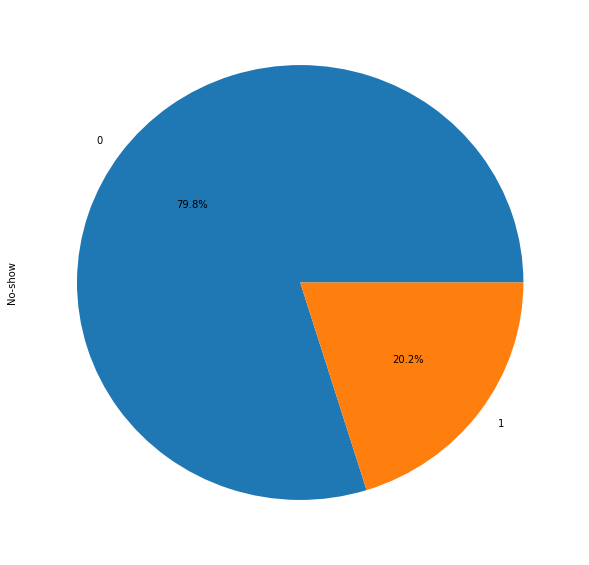

In [12]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df['No-show'].value_counts().plot.pie(autopct='%0.1f%%', figsize=(10,10));

### Research Question 2  (what is the relation between the Gender, Age, Scholarship, Hypertension,Diabetes, Alcoholism, Handicap and SMS_received and patient's show up?)

###### 1-Relation between the age and patient's show up

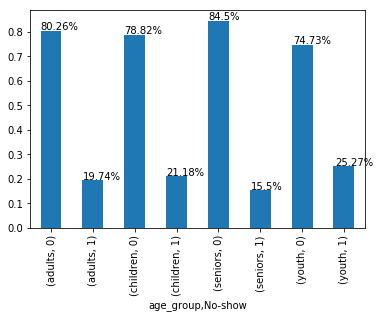

In [13]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
def plotting(col):
    '''
    this function takes a column name fron the dataframe and returns plotting bar chart 
    of the percentages of this column values in a relation with patient's show up.
    '''
    plotStatment = df.groupby(col)['No-show'].value_counts(normalize=True).plot(kind='bar')
    
    for p in plotStatment.patches:
        plotStatment.annotate(str(round(p.get_height()*100,2))+'%', (p.get_x() * 1.005, p.get_height() * 1.005))


def age_groups(age):
    '''
    this function takes an argument 'age' and calcify it to it's age group
    '''
    if age <= 14:
        return 'children'
    elif age <= 24:
        return 'youth'
    elif age <= 64:
        return 'adults'
    else:
        return 'seniors'
df['age_group'] = df.Age.apply(age_groups)

plotting('age_group')

###### 2-Relation between the gender and patient's show up

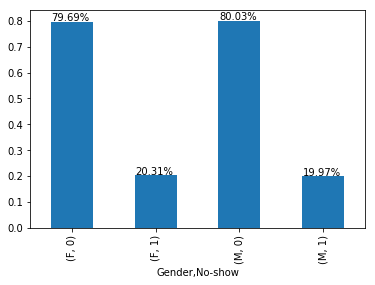

In [14]:
plotting('Gender')

###### 3-Relation between Scholarship and patient's show up

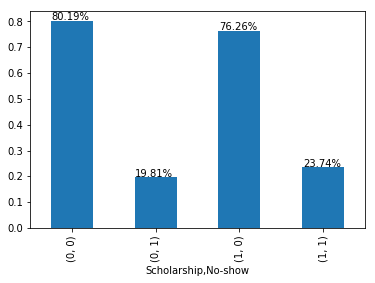

In [15]:
plotting('Scholarship')

###### 4-Relation between Hypertension,Diabetes and patient's show up

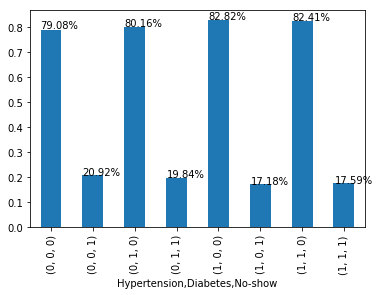

In [16]:
plotting(['Hypertension','Diabetes'])

###### 5-Relation between Alcoholism and patient's show up

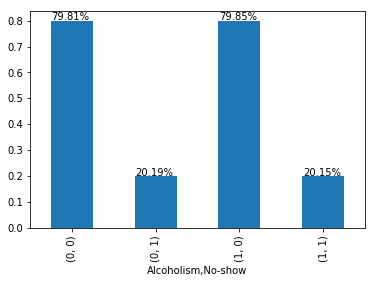

In [17]:
plotting('Alcoholism')

###### 6-Relation between Handicaped patients and patient's show up

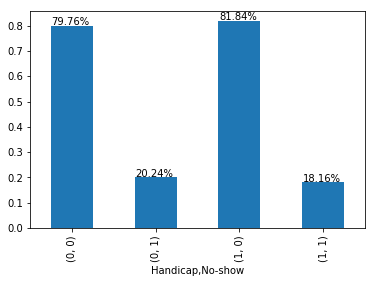

In [18]:
#converting any vlaue more than 0 of hadicap column to 1 to make it easier for analysis
df['Handicap'].replace([2,3,4],[1,1,1], inplace=True)
plotting('Handicap')

###### 7-Relation between SMS_received and patient's show up

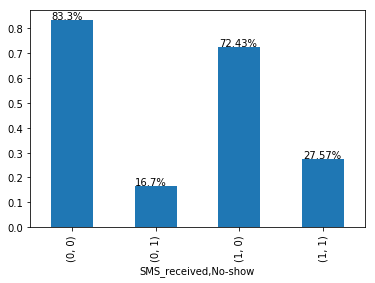

In [19]:
plotting('SMS_received')

## limitations:
    1-missing some useful features like (educational status, marital status, employment status). 
    2-some data is wrong as there is no one has an age of 0 or less.

<a id='conclusions'></a>
## Conclusions
    1-Patients that showed up is more than that not with a percentage of 79.8%.
    2-Gender, Hypertension, Diabetes, Handicap and Alcholisim are not factors to decide if the patient will show up or not.
    3-SMS is not necessary as 83.3% of who didn't received it showed up and 27.57% of who received it didn't show up.
    4-Patients who have the Scholarship are missing thier appoiontments with the percentage of 76.26% more than who not have the Scholarship with the percentage of 80.19%.
    5-Youth patients whose ages range from 15-24 years are the most patients who miss thier appointment. 

In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0